# IMPORTS

In [73]:
import cv2
import os 
import tensorflow

import keras
import matplotlib.pyplot as plot
import matplotlib.image as mpimg

import numpy as np
import glob
import pickle

print('done')

done


# PARSE IRIS DATASET

In [74]:
# Get Images
def parse_iris_dataset():
    eye_num_2 = 0
    label = 0
    eye_images = []
    eye_L_images = []
    eye_R_images = []
    final_output = []
    lables = []

    base_directory = 'Dataset/VISA_Iris/VISA_Iris'
    
    for path in glob.iglob(base_directory+'/*'):
        foldername = os.path.basename(path)
        label = foldername
        print('label: ' + label)
        image_id = 0   
        
        for image_path in glob.iglob(path+'/L/*'):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (400, 300))
            eye_L_images.append([image, image_id, label]) #just left iris
            eye_images.append([image, image_id, label])
            image_id += 1
        print('L eye: ' + str(len(eye_L_images)))
            
        for image_path in glob.iglob(path+'/R/*'):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (400, 300))
            eye_R_images.append([image, image_id, label]) #just right iris
            eye_images.append([image, image_id, label])
            image_id += 1            
        print('R iris: ' + str(len(eye_R_images)))
    
    print('iris images: ' + str(len(eye_images)))    
    return eye_images   
    
             
# Preprocess Image (Binarize)
# /Users/ngzhengwei/Desktop/Current/CSCI158/FaceAndIris_Recognition/Dataset/VISA_Face
# Resize Images (RegionProp)
#

# IRIS DETECTION

In [75]:

import math


def iris_detection(eye_images, display):
    eye_num_2 = 0
    eyes_num = 0
    # explain how this works in presentation
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    for eye_image in eye_images:
        (image, image_id, label) = eye_image
        image_id += 1
        eyes = eye_cascade.detectMultiScale(image, 1.1, 0)

        if len(eyes) > 1:  # idk what is happening
            eyes_num = eyes_num + 1
            maxium_area = -3
        
        for (x, y, width, height) in eyes:
            area = width * height

            if area > maxium_area:
                maxium_area = area
                maxium_width = width
                point_x = x
                point_y = y
                maxium_height = height
        #test
            # pupil_frame = image[y:y + height, x:x + width]
            # ret, thresh = cv2.threshold(pupil_frame, 80, 255, cv2.THRESH_BINARY)
            # cv2.imshow("threshold", thresh)
            # im2, contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            # print(contours)
        #endtest
        
        #test
            # for contour in contours:
            #     area = cv2.contourArea(contour)
            #     rect = cv2.boundingRect(contour)
            #     x, y, w, h = rect
            #     radius = 0.15 * (w + h)

            #     area_condition = (100 <= area <= 200)
            #     symmetry_condition = (abs(1 - float(w)/float(h)) <= 0.2)
            #     fill_condition = (abs(1 - (area / (math.pi * math.pow(radius, 2.0)))) <= 0.4)
            #     cv2.circle(image, (int(x + x + radius), int(y + y + radius)), int(1.3 * radius), (0, 180, 0), -1)

            # cv2.imshow('Pupil Detector', image)
            # c = cv2.waitKey(1) 
            # if c == 27: 
            #     break
        # #endtest
            

        image_unboxed = image.copy()

        image_cropped = image_unboxed[point_y:point_y + maxium_height,
                                      point_x:point_x + maxium_width,]

        image_boxed = cv2.rectangle(
            image,
            (point_x, point_y),
            (point_x+maxium_width, maxium_height),
            (255, 0, 0),
            2,
        )

        cv2.imwrite(
            'Processed/'+str(label)+ '.' + str(image_id) + '.Iris' + '.bmp',
            image_cropped
        )
    if (display):
        fig, axes = plot.subplots(1, 3, figsize=(12, 5))

        axes[0].imshow(image_unboxed)
        axes[0].set_title('Original Image')
        axes[0].axis('off')  # Hide axes for cleaner presentation

        axes[1].imshow(image_boxed)
        axes[1].set_title('Haar Iris Cascade Classifier Detection')
        axes[1].axis('off')

        axes[2].imshow(image_cropped)
        axes[2].set_title('Cropped Eye')
        axes[2].axis('off')

        plot.tight_layout()
        plot.show()

    print("total_eyes_found = ", eyes_num)
    print("total_eyes_found 2 = ", eye_num_2)
    print("total images: ", len(eye_images))

# MAIN

label: S0001_F_30
L eye: 19
R iris: 26
iris images: 45


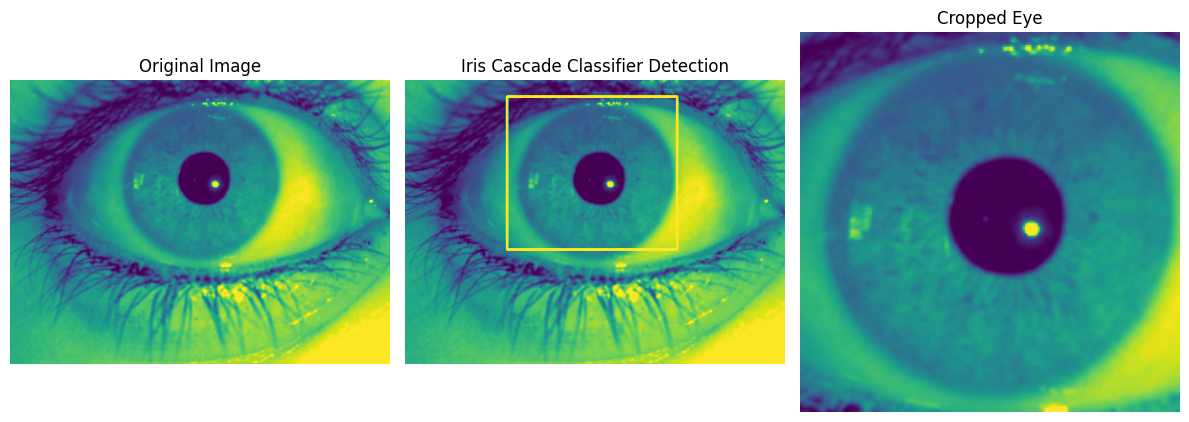

total_eyes_found =  45
total_eyes_found 2 =  0
total images:  45


In [76]:
eye_images = parse_iris_dataset()
iris_detection(eye_images, 1) #param 2 is for display (1 = display, 0 = don't display)
